In [1]:
from econometron.Models.Neuralnets import NBEATS,Trainer_ts
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
GDP=pd.read_csv("../../Data_Fred/gdp.csv", index_col=0, parse_dates=True)/1000

<Axes: xlabel='observation_date'>

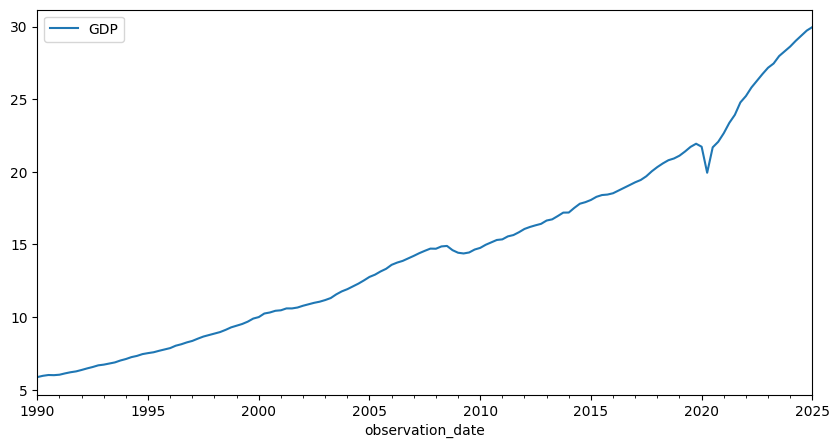

In [3]:
GDP.plot(figsize=(10, 5))

In [4]:
H=5  # Horizon _ forecast len
n=2  # back_coeff : n*H => Backcast len 
stack_config = [
    {
        'num_B_per_S': 4,
        'Blocks': ['G', 'T', 'S'],
        'Layer_size': [512, 512, 512],
        'Harmonics': [2, 3],  # First S gets 2, second would get 3
        'Degree': [2],     # First T_P gets 2, T gets 3
        'Dropout': [0.1, 0.1, 0.2],
        'num_lay_per_B': [3, 3, 3],
        'share_weights': False
    },
    {
        'num_B_per_S': 2,
        'Blocks': ['G'],
        'Harmonics': [4],
        'Layer_size': [256, 512],
        'Dropout': [0.1, 0.1],
        'num_lay_per_B': [4, 3]
    },
    {
        'Blocks': ['T', 'S'],  # Uses default num_B_per_S=3
        'Harmonics': [2],
        'Degree': [2, 3]
    }]
nbeat=NBEATS(n,H,n_s=len(stack_config),stack_configs=stack_config)

2025-08-29 19:07:48,008 - econometron.Models.Neuralnets.n_beats - INFO - Starting learning rate finder from 1e-07 to 10
INFO:econometron.Models.Neuralnets.n_beats:Starting learning rate finder from 1e-07 to 10
2025-08-29 19:07:48,008 - econometron.Models.Neuralnets.n_beats - INFO - Using optimizer: adam, loss function: mae
INFO:econometron.Models.Neuralnets.n_beats:Using optimizer: adam, loss function: mae
2025-08-29 19:07:48,024 - econometron.Models.Neuralnets.n_beats - INFO - Preparing datasets with 141 data points
INFO:econometron.Models.Neuralnets.n_beats:Preparing datasets with 141 data points
2025-08-29 19:07:48,024 - econometron.Models.Neuralnets.n_beats - INFO - Creted sequences - X shape (127, 10) ,y shape (127, 5)
INFO:econometron.Models.Neuralnets.n_beats:Creted sequences - X shape (127, 10) ,y shape (127, 5)
2025-08-29 19:07:48,024 - econometron.Models.Neuralnets.n_beats - INFO - Train sequences: 101, Validation sequences: 26
INFO:econometron.Models.Neuralnets.n_beats:Train

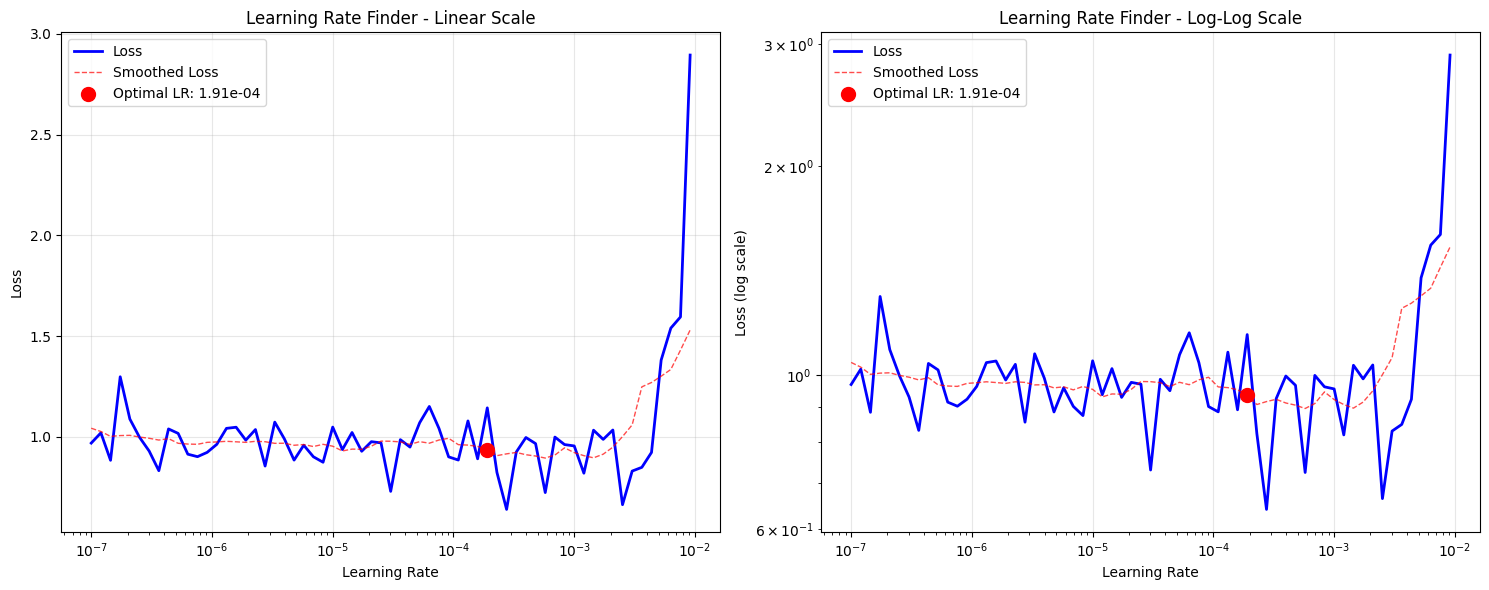

2025-08-29 19:07:58,275 - econometron.Models.Neuralnets.n_beats - INFO - Learning rate finder plot displayed
INFO:econometron.Models.Neuralnets.n_beats:Learning rate finder plot displayed
2025-08-29 19:07:58,359 - econometron.Models.Neuralnets.n_beats - INFO - ============================== Model Training - START - ==============================
INFO:econometron.Models.Neuralnets.n_beats:============================== Model Training - START - ==============================
2025-08-29 19:07:58,376 - econometron.Models.Neuralnets.n_beats - INFO - Preparing datasets with 141 data points
INFO:econometron.Models.Neuralnets.n_beats:Preparing datasets with 141 data points
2025-08-29 19:07:58,376 - econometron.Models.Neuralnets.n_beats - INFO - Creted sequences - X shape (127, 10) ,y shape (127, 5)
INFO:econometron.Models.Neuralnets.n_beats:Creted sequences - X shape (127, 10) ,y shape (127, 5)
2025-08-29 19:07:58,376 - econometron.Models.Neuralnets.n_beats - INFO - Train sequences: 101, Valid

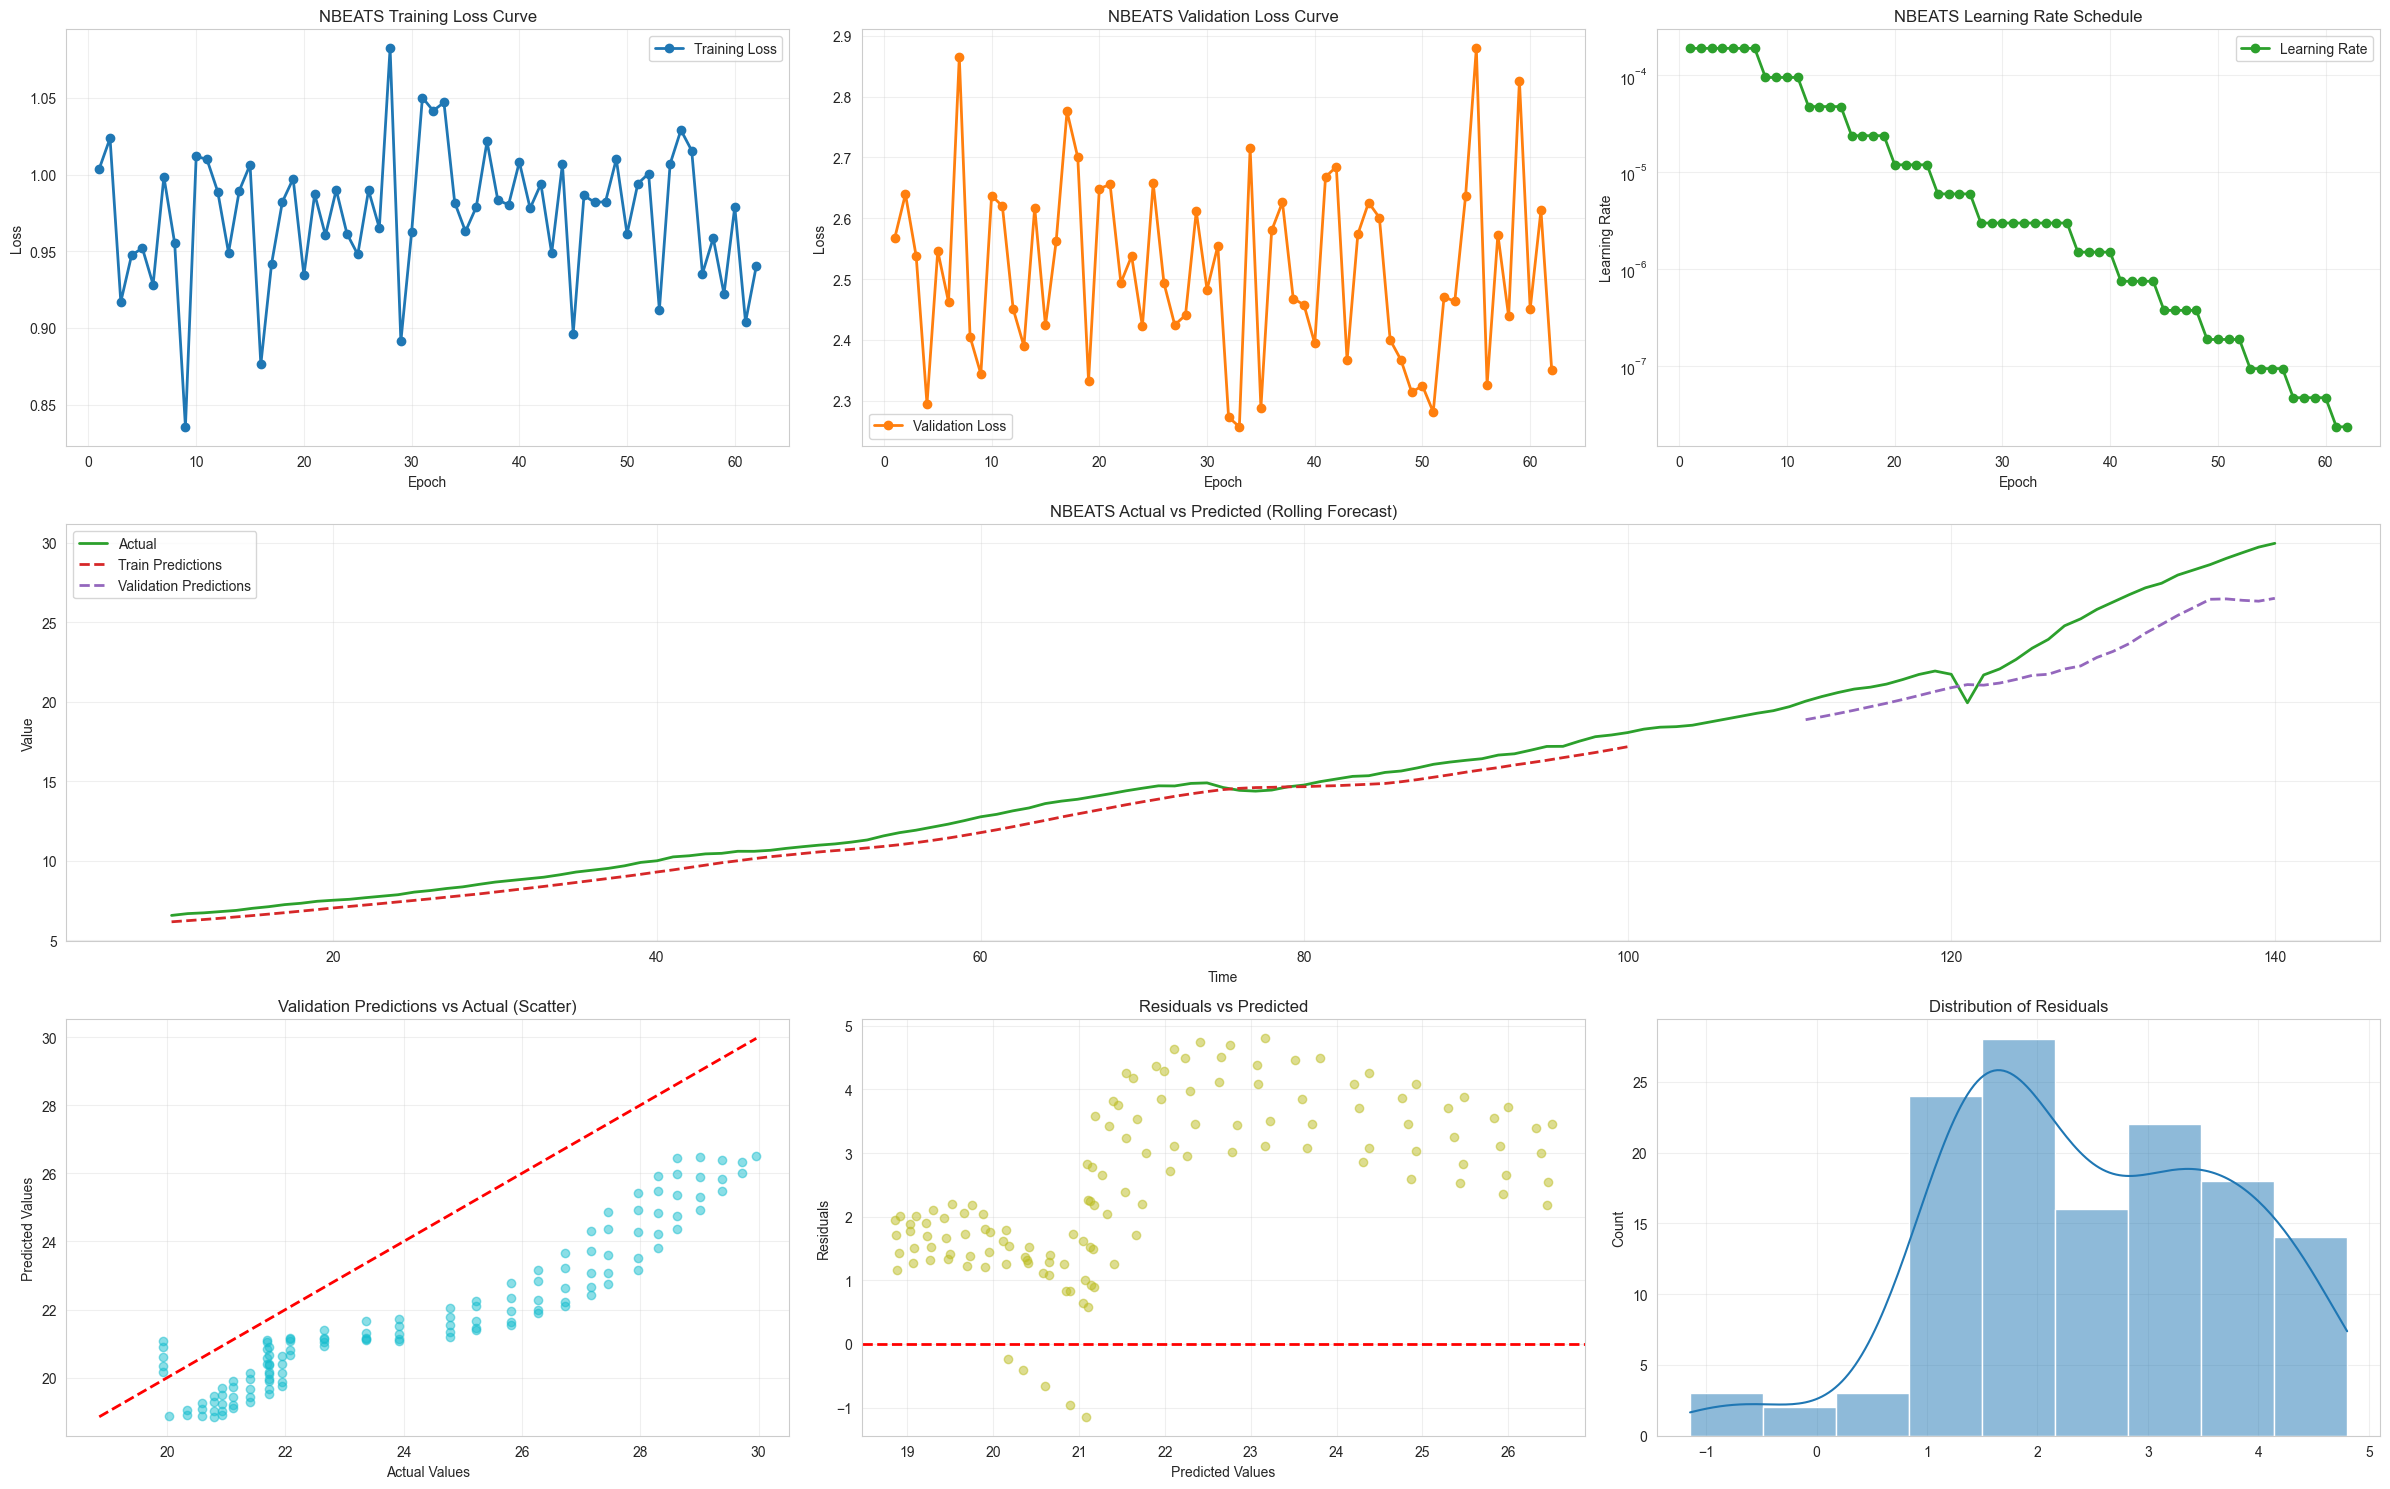

2025-08-29 19:08:19,793 - econometron.Models.Neuralnets.n_beats - INFO - ==================================================
INFO:econometron.Models.Neuralnets.n_beats:==================================================
2025-08-29 19:08:19,795 - econometron.Models.Neuralnets.n_beats - INFO - ==================================================
INFO:econometron.Models.Neuralnets.n_beats:==================================================
2025-08-29 19:08:19,798 - econometron.Models.Neuralnets.n_beats - INFO - OUT-OF-SAMPLE FORECASTING
INFO:econometron.Models.Neuralnets.n_beats:OUT-OF-SAMPLE FORECASTING
2025-08-29 19:08:19,800 - econometron.Models.Neuralnets.n_beats - INFO - ==================================================
INFO:econometron.Models.Neuralnets.n_beats:==================================================
2025-08-29 19:08:19,802 - econometron.Models.Neuralnets.n_beats - INFO - Forecasting 5 steps ahead using backcast length: 10
INFO:econometron.Models.Neuralnets.n_beats:Forecastin

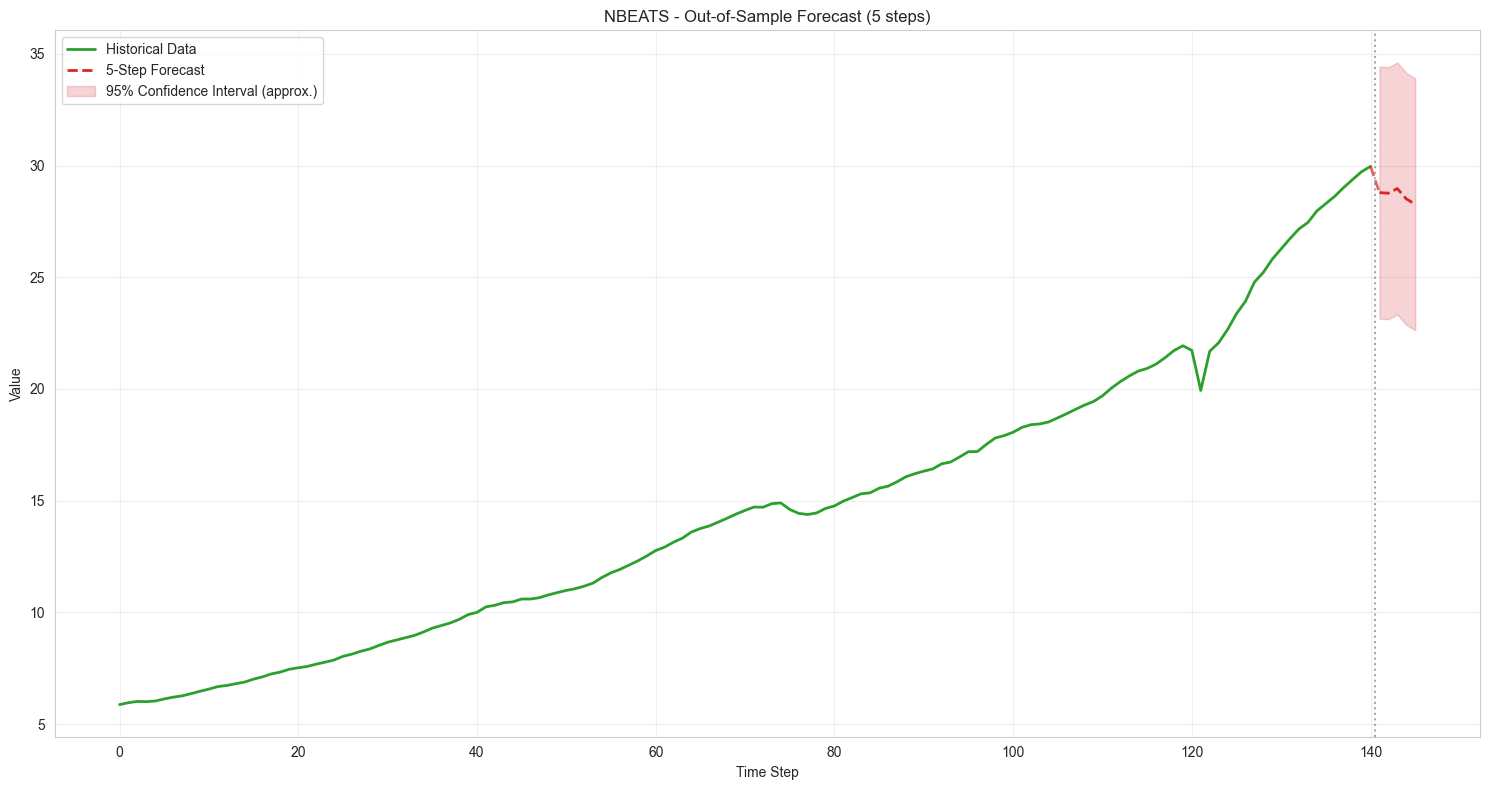

2025-08-29 19:08:20,402 - econometron.Models.Neuralnets.n_beats - INFO - ==================================================
INFO:econometron.Models.Neuralnets.n_beats:==================================================


array([28.788172, 28.75908 , 28.969358, 28.506678, 28.26447 ],
      dtype=float32)

In [5]:
trainer = Trainer_ts(model=nbeat,normalization_type='revin',device='cpu')
lrs, losses, suggested_lr = trainer.find_optimal_lr(data=GDP,batch_size=32,back_coeff=2,Horizon=5,val_split=0.2)
trainer.fit(GDP,2,5,1000,'adam',suggested_lr,64,1.5,'plateau','mae',30,0.2,True)
trainer.summary()
trainer.forecast_out_of_sample(steps=5)